# `01_preprocess.ipynb`

## 0.1 - Setup

### 0.1.1 - Package Imports

In [28]:
# imports from python standard library
import re
from pathlib import Path

# data science packages
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# huggingface packages

### 0.1.2- Constants

In [8]:
DATA_DIR = Path("./data")
DATA_DIR_RAW = DATA_DIR / "raw"
TRANSCRIPT_DATA = DATA_DIR_RAW / "transcript/The-Office-Lines-V4.csv"

## 0.2 Import Data

In [12]:
script_df = pd.read_csv(
    filepath_or_buffer=TRANSCRIPT_DATA,
    header=0,
    usecols=['season', 'episode', 'title', 'scene', 'speaker', 'line']
    )

script_df.sample(20)

,season,episode,title,scene,speaker,line
23580,5,20,New Boss,3750,Charles,"Sp-Well, um, Michael should have filled you in..."
44289,8,13,Jury Duty,6606,Dwight,That's good enough for me.
14404,4,3,Dunder Mifflin Infinity (Parts 1&2),2448,Angela,Elevators.
18864,5,3,Business Ethics,3155,Jim,To get married.
7915,3,3,The Coup,1352,Michael,"Dwight, can I talk to you for a second?"
35476,7,7,Christening,5389,Andy,What if the moon was your car and Jupiter was ...
28104,6,7,The Lover,4320,Dwight,"Punishment fits the crime, I accept."
2688,2,5,Halloween,435,Dwight,"Wait, what are you again? Oh, right... Three-h..."
8002,3,3,The Coup,1365,Dwight,I'll do anything! Anything! I'll do your laun...
50034,9,9,Dwight Christmas,7432,Dwight,They're not abandoning the party.


# 1 - EDA

## 1.1 - Speaker Frequency

In [21]:
# no filtering for seasons
script_df['speaker'].value_counts(normalize=True).nlargest(10)

Michael    0.197214
Dwight     0.123604
Jim        0.113902
Pam        0.091037
Andy       0.067697
Kevin      0.028100
Angela     0.028082
Erin       0.025867
Oscar      0.024457
Ryan       0.021638
Name: speaker, dtype: float64

Across all nine seasons, Michael has the highest proportion of individual utterances.

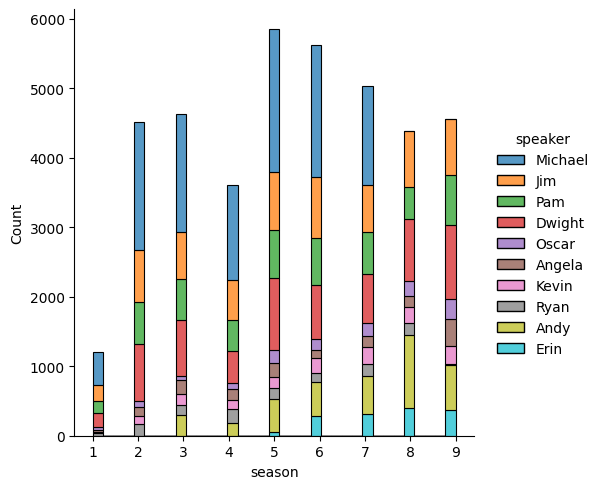

In [32]:
top_10_speaker_list = script_df['speaker'].value_counts(normalize=True).nlargest(10).index.tolist()
top_10_speaker_df = script_df.loc[script_df['speaker'].isin(top_10_speaker_list)]

sns.displot(
    top_10_speaker_df,
    x='season',
    hue='speaker',
    multiple='stack'
);

That's one view of per-season speakers, albeit somewhat challenging to interpret given there are a different number of total utterances per season.

What about each character's speaking per season:

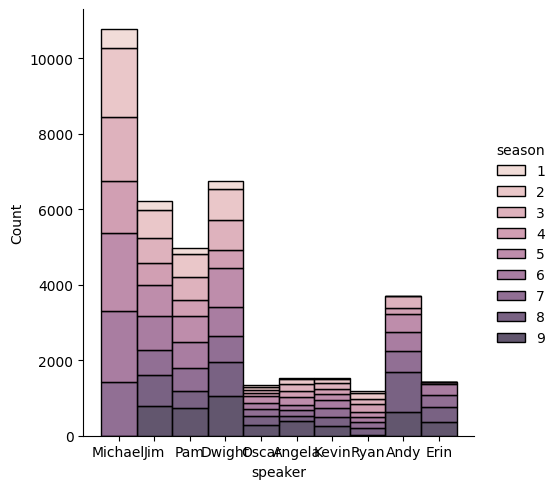

In [33]:
sns.displot(
    top_10_speaker_df,
    x='speaker',
    hue='season',
    multiple='stack'
);

# Preprocess